# Poisson statistics

### Goals:

1. To introduce the Poisson distribution
2. To understand how to assign errors to a counting experiment

### Timing

1. Try to finish this notebook in 20-25 minutes


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### New functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.poisson($\lambda$)   | Draw a random number from a Poisson distribution with mean $\lambda$|
|    scipy.stats.poisson.pmf(x, $\lambda$)           | Get the Poisson probability density function with mean $\lambda$ for given x values  |

## Cosmic rays

At any given point in time, particles from space are passing through us. These particles are known as "cosmic rays". Even though cosmic rays were discovered in 1912, certain aspects of the spectrum are still quite mysterious- there are a number of experiments, such as the Pierre Auger Observatory, studying cosmic rays.

At sea level, it turns out that muons make up most of the charged cosmic rays. Muons behave similarly to electrons, but they are 200 times heavier than the electron. If you had a particle detector set up to measure these muons in your lab, you would observe that the arrival of these muons is **random**. 

## Poisson distribution

To understand the data in your particle detector, or any "counting experiment" where you need to count the number of times a random process happens (think radioactive decays), let's look at the Poisson distribution. 

If you have (rare) events occuring randomly at an average rate, *where each event occurs independently of any other event*, the probability that you will see $k$ events in a given time interval is described by the Poisson distribution: 

### $P(k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

Let's break down this equation:

- $\lambda$ is the average number of events that will occur in a given interval of time. $P(k | \lambda)$ represents the probability of $k$ events happening in the same time interval given an average number of events $\lambda$.

- The expected value (mean) of the Poisson distribution is $\lambda$, and the variance of the distribution is also $\lambda$. You only have to remember one parameter!

To get a feeling for the shapes, here are three Poisson distributions, with $\lambda$ = 1, 2, 5.

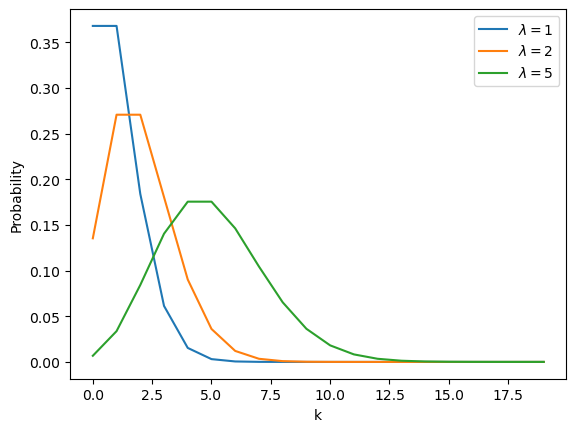

In [2]:
x = np.arange(0,20,1)
for mu in [1,2,5]:
    plt.plot(x, stats.poisson.pmf(x, mu=mu), label=rf"$\lambda = {mu:d}$")
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()

### Questions for discussion:

#### 5.1 Do the distributions have the shape that you would expect them to have? 

#### 5.2 What's the probability of seeing 10 events in the next minute if, on average, 5 events occur every minute?


## Higher rates
Let's extend the x-axis of this plot a bit, and plot some Poisson distributions with larger $\lambda$ values:

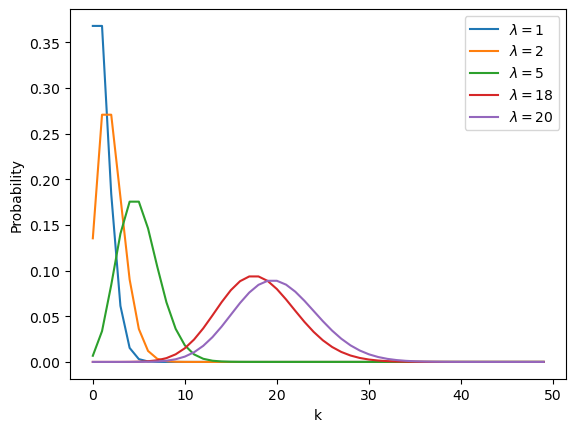

In [3]:
x = np.arange(0,50,1)
for mu in [1,2,5,18,20]:
    plt.plot(x, stats.poisson.pmf(x, mu=mu), label=rf"$\lambda = {mu:d}$")
plt.xlabel('k')
plt.ylabel('Probability')
plt.legend()
plt.legend()

### Questions for discussion
#### 6.1 What do you notice about the shape of the Poisson distribution with larger $\lambda$ values? 

## Counting the number of muons in the next 10 minutes

### Rate of muons

If you hold out your hand, there is on average about 1 fairly energetic muon per minute passing through a square centimeter of your hand.

Let's pretend we have a muon detector in our hand. We can simulate an experiment where we count the number of muons passing through 1 square centimeter for the next minute:

In [4]:
rng = np.random.default_rng(42)

In [5]:
count_once = rng.poisson(1) # sample from the Poisson distribution with mean of 1
print("Number of muons in a minute:",count_once)

Number of muons in a minute: 1


 Let's repeat this experiment 100 times and make a distribution of our measurements:

In [6]:
muon_counts = rng.poisson(1, size=100) # Sample from the Poisson distribution with mean of 1, 100 times
muon_counts[0:10] # display first 10 samples

array([2, 3, 1, 3, 0, 1, 3, 3, 1, 0])

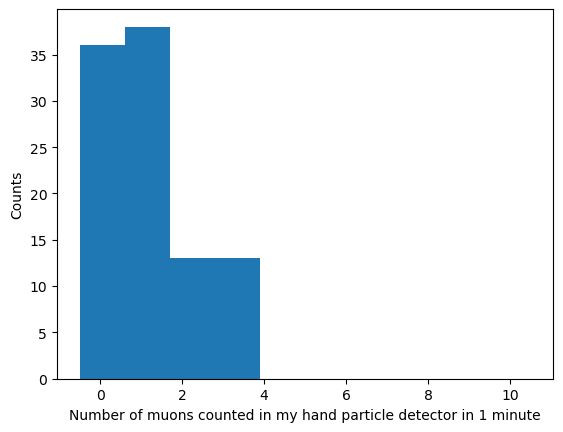

In [7]:
plt.hist(muon_counts, bins=np.linspace(-0.5,10.5,11))
plt.xlabel("Number of muons counted in my hand particle detector in 1 minute")
plt.ylabel("Counts")
plt.show()

Similar to the Hubble data, we can take the mean and the standard deviation of the distribution to get an estimate of the average number of muons expected in a given minute. 

In [8]:
print("Mean of measurements:              ", np.mean(muon_counts))
print("Standard deviation of measurements:", np.std(muon_counts))
print("Rel. error (standard deviation/mean):", np.std(muon_counts)/np.mean(muon_counts))

Mean of measurements:               1.03
Standard deviation of measurements: 1.0045396955820112
Rel. error (standard deviation/mean): 0.9752812578466128


#### Let's go up in elevation.
The muon flux increases as you go above sea level. Let's stop at the top of an imaginary  mountain where our rate of muons is expected to be 100 times higher. Let's start counting again, and then repeat our measurement 100 times. 

In [9]:
count_once_100 = rng.poisson(100, size=1) # Sample from the Poisson distribution with mean of 100
print("Number of muons in 1 minute:", count_once_100[0])
muon_counts_100 = rng.poisson(100, size=100); # Sample from the Poisson distribution with mean of 100, 100 times

Number of muons in 1 minute: 91


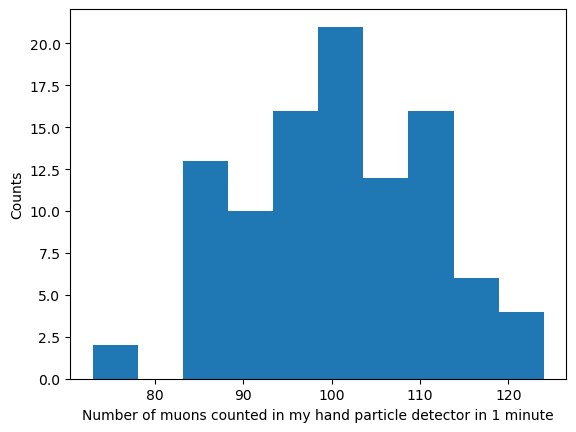

In [10]:
plt.hist(muon_counts_100)
plt.xlabel("Number of muons counted in my hand particle detector in 1 minute")
plt.ylabel("Counts")
plt.show()

In [11]:
print("Mean of measurements:              ", np.mean(muon_counts_100))
print("Standard deviation of measurements:", np.std(muon_counts_100))
print("Rel. error (standard deviation/mean):", np.std(muon_counts_100)/np.mean(muon_counts_100))

Mean of measurements:               100.62
Standard deviation of measurements: 10.322577197580069
Rel. error (standard deviation/mean): 0.10258971573822369


### Questions for discussion
#### 7.1 If you detected 100 muons in a minute, how confident would you be about saying the average number of muons passing through your detector per minute is 100? Similarly, if you detected only 1 muon, how confident would you be about saying the average number of muons passing through your detector per minute is 1?